In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
mpl.rc('axes', labelsize=14)
mpl.rc('legend', fontsize=11)
mpl.rc('text', usetex=True)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

In [3]:
algs = ['adaihs_srht', 'adaihs_sjlt', 'adacg_srht', 'adacg_sjlt', 'cg', 'pcg_srht', 'pcg_sjlt']
ada_algs = ['adaihs_srht', 'adaihs_sjlt', 'adacg_srht', 'adacg_sjlt']

labels = {'cg': 'CG', 'pcg_srht': 'PCG/SRHT', 'pcg_sjlt': 'PCG/SJLT', 
         'adacg_srht': 'adaPCG/SRHT', 'adacg_sjlt': 'adaPCG/SJLT', 
         'adaihs_srht': 'adaIHS/SRHT', 'adaihs_sjlt': 'adaIHS/SJLT'}

colors = {'cg': 'darkgoldenrod',
          'pcg_sjlt': 'lightcoral',
          'adacg_sjlt': 'crimson',
          'adaihs_sjlt': 'darkred',
          'pcg_srht': 'deepskyblue',
          'adacg_srht': 'mediumblue', 
          'adaihs_srht': 'royalblue'}

linestyles = {'cg': '--',
             'pcg_sjlt': ':',
             'adacg_sjlt': ':',
             'adaihs_sjlt': ':',
             'pcg_srht': '-.',
             'adacg_srht': '-.',
             'adaihs_srht': '-.'}

markers = {'cg': '',
           'pcg_sjlt': '*',
           'adacg_sjlt': 'P',
           'adaihs_sjlt': 'x',
           'pcg_srht': 's',
           'adacg_srht': 'd',
           'adaihs_srht': 'h'}

fillstyles = {'cg': 'none',
              'pcg_sjlt': 'full',
              'adacg_sjlt': 'none',
              'adaihs_sjlt': 'none',
              'pcg_srht': 'none',
              'adacg_srht': 'none',
              'adaihs_srht': 'none'}

MWIDTH = 1.5

markeredgewidths = {'cg': MWIDTH,
                    'pcg_sjlt': MWIDTH,
                    'adacg_sjlt': MWIDTH,
                    'adaihs_sjlt': MWIDTH,
                    'pcg_srht': MWIDTH,
                    'adacg_srht': MWIDTH,
                    'adaihs_srht': MWIDTH}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

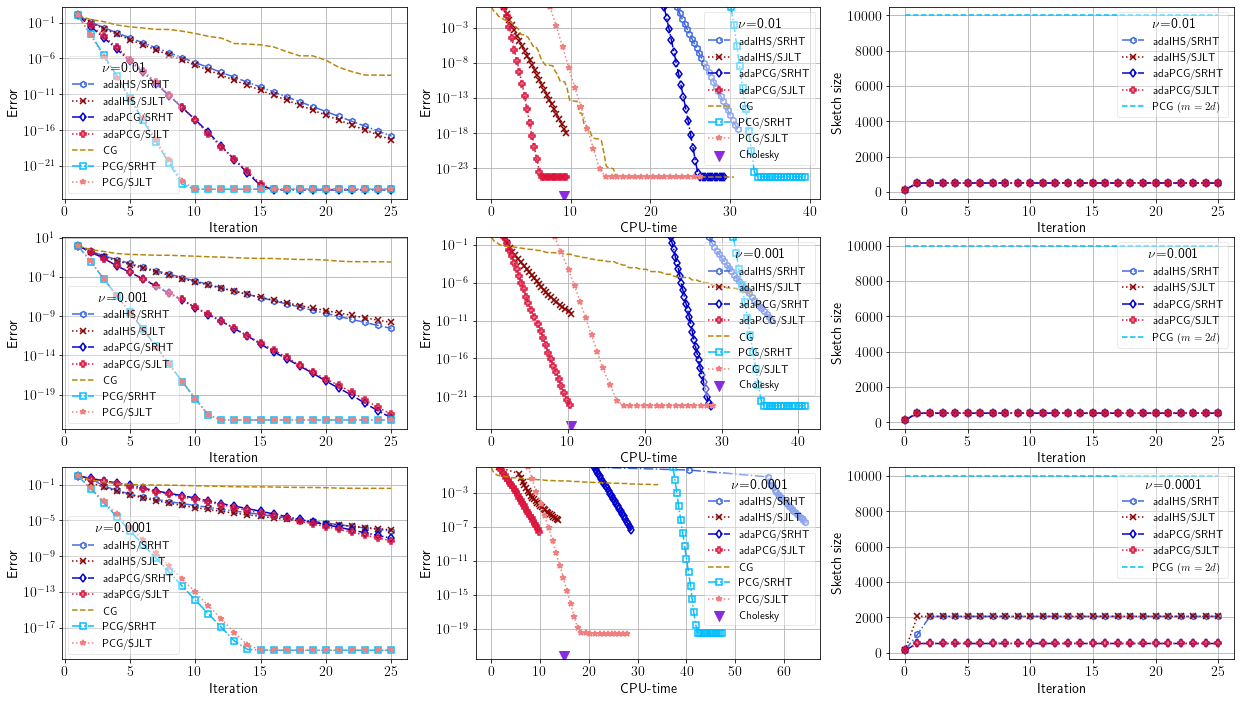

In [8]:
save_fig = False

params = {}


params['CIFAR-100'] = [(60000, 3072, 0.01), 
                       (60000, 3072, 0.001), 
                       (60000, 3072, 0.0001), 
                      ]

params['SVHN'] = [(99289, 3073, 0.01), 
                  (99289, 3073, 0.001), 
                  (99289, 3073, 0.0001), 
                 ]

params['OVA_Lung'] = [(10936, 1545, 0.01), 
                      (10936, 1545, 0.001), 
                      (10936, 1545, 0.0001),
                     ]

params['dilbert'] = [(10000, 2001, 0.01), 
                     (10000, 2001, 0.001), 
                     (10000, 2001, 0.0001),
                     ]

params['guillermo'] = [(20000, 4297, 0.01), 
                       (20000, 4297, 0.001), 
                       (20000, 4297, 0.0001),
                      ]



dataset = 'dilbert'

fig, ax = plt.subplots(len(params[dataset]),3, figsize=(21,len(params[dataset])*4.))

max_iter_on_plot = 25

for ii, param in enumerate(params[dataset]):

    n, d, nu = param
    res_dir = './results/'+dataset+'_nu_'+str(nu)+'.npz'
    results_ = np.load(res_dir, allow_pickle=True)
    results = {key: results_[key].squeeze() for key in results_.files}
    
    errs, times = results['errs'].item(), results['times'].item()
    sketch_sizes = results['sketch_sizes'].item()
    baseline_time = times['baseline_time']

    cur_min = np.inf

    for alg in algs:
        cur_min = min((errs[alg]/errs[alg][0])[-1], cur_min)
        ax[ii,0].plot(1+np.arange(min(max_iter_on_plot, len(errs[alg]))), errs[alg][:max_iter_on_plot]/errs[alg][0], 
                   linestyle=linestyles[alg], marker=markers[alg], color=colors[alg],
                   fillstyle=fillstyles[alg], markeredgewidth=markeredgewidths[alg],
                   label=labels[alg])

        ax[ii,1].plot(times[alg], errs[alg]/errs[alg][0], 
                   linestyle=linestyles[alg], marker=markers[alg], color=colors[alg],
                   fillstyle=fillstyles[alg], markeredgewidth=markeredgewidths[alg],
                   label=labels[alg])

    ylim = cur_min / 1000
    ax[ii,1].scatter(baseline_time, 2*ylim, marker='v', s=100., color='blueviolet', label='Cholesky')
    ax[ii,1].set_ylim(bottom=ylim)

    ax[ii,0].set_yscale('log')
    ax[ii,1].set_yscale('log')
    ax[ii,0].legend(loc='best', framealpha=0.4, title=r'$\nu$='+str(nu), title_fontsize=14)
    ax[ii,1].legend(loc='upper right', framealpha=0.4, title=r'$\nu$='+str(nu), title_fontsize=14)
    ax[ii,0].set_xlabel('Iteration')
    ax[ii,1].set_xlabel('CPU-time')
    ax[ii,0].set_ylabel('Error')
    ax[ii,1].set_ylabel('Error')

    ax[ii,0].grid(which='both')
    ax[ii,1].grid(which='both')

    for alg in ada_algs:
        ax[ii,2].plot(sketch_sizes[alg], linestyle=linestyles[alg], marker=markers[alg], 
                      color=colors[alg], fillstyle=fillstyles[alg], markeredgewidth=markeredgewidths[alg],
                      label=labels[alg])
        
    ax[ii,2].plot([2*d]*len(sketch_sizes[alg]), linestyle='--', color='deepskyblue', label='PCG '+r'$(m=2d)$')
    
    ax[ii,2].legend(loc='upper right', framealpha=0.4, title=r'$\nu$='+str(nu), title_fontsize=14)
    ax[ii,2].set_xlabel('Iteration')
    ax[ii,2].set_ylabel('Sketch size')
    ax[ii,2].grid(which='both')

if save_fig:
    fig.savefig('./plots/'+dataset+'.png', bbox_inches='tight')    
    fig.savefig('./plots/'+dataset+'.eps', bbox_inches='tight')       
    
plt.show()
